# 딥러닝을 이용한 자연어처리
자연어 : 우리가 평소에 말하는 음성이나 텍스트<br>
자연어 처리 : 음성이나 텍스트를 컴퓨터가 인식하고 처리하는 것

- 언어의 규칙은 컴퓨터의 규칙과 달리 해결되지 않는 여러 문제를 안고 있었는데, 딥러닝이 등장하면서 자연어 처리 연구가 활발해지기 시작했음
- 이는 대용량 데이터를 학습할 수 있는 딥러닝의 속성. 즉, 비교적 쉽게 얻을 수 있는 자연어 데이터를 지속적으로 입력해 끊임없이 학습하는 것이 가능해졌기 때문
- 텍스트 자료를 모았다고 해서 이를 딥러닝에 그대로 입력할 수 없음<br>
[컴퓨터 알고리즘은 수치로 된 데이터만 이해할 뿐 텍스트는 이해할 수 없음]
- 텍스트를 전처리 하는 과정이 필요함

### 1. 텍스트의 토큰화
- 토큰 : 입력할 텍스트를 단어별, 문장별, 형태소별로 작게 나누어진 하나의 단위
- 토큰화 : 텍스트를 잘게 나누는 과정
- keras가 제공하는 text_to_word_sequence()

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array

# 케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence
 
# 전처리할 텍스트를 정합니다.
text = '해보지 않으면 해낼 수 없다'
 
# 해당 텍스트를 토큰화합니다.
result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


- 주어진 텍스트를 쪼개고 나면 여러 가지를 할 수 있음 <br>
ex) 각 단어가 몇 번 중복되어 쓰였는지 <br>
- 단어의 빈도수를 알면 텍스트에서 중요한 역할을 하는 단어를 파악할 수 있음
<br>

- **Bag-of-Words** : 같은 단어끼리 따로따로 가방에 담은 후 각 가방에 몇 개의 단어가 들어 있는지 세는 방법
- keras의 Tokenizer()

In [2]:
# 단어의 빈도수 세기

# 전처리하려는 세 개의 문장을 정합니다.
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
       '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.',
       ]
 
# 토큰화 함수를 이용해 전처리 하는 과정입니다.
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용
 
# 단어의 빈도수를 계산한 결과를 각 옵션에 맞추어 출력합니다.
# Tokenizer()의 word_counts 함수는 순서를 기억하는 OrderedDict 클래스를 사용합니다.
# word_counts : 단어의 빈도수
print("\n단어 카운트:\n", token.word_counts) 

# 출력되는 순서는 랜덤입니다. 
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇 개의 문장에 포함되어 있는가:\n", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index)


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇 개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'토큰화': 1, '각': 1, '먼저': 1, '나누어': 1, '텍스트의': 2, '합니다': 1, '단어를': 1, '단어로': 1, '딥러닝에서': 2, '토큰화해야': 1, '인식됩니다': 1, '있습니다': 1, '수': 1, '사용할': 1, '결과는': 1, '토큰화한': 1})

각 단어에 매겨진 인덱스 값:
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


### 2. 단어의 원-핫 인코딩
- 단순히 단어의 출현 빈도만 가지고는 해당 단어가 문장의 어디에서 왔는지, 각 단어의 순서는 어떠했는지 등의 정보는 얻을 수 없음 -> 단어가 문장의 다른 요소와 어떤 관계를 가지고 있는지 알아보는 방법이 필요함 
- **원-핫 인코딩** : 각 단어를 모두 0으로 바꾸어 주고 원하는 단어만 1로 바꾸어 주는 것

In [3]:
# 먼저 토큰화 함수를 불러와 단어 단위로 토큰화
# 각 단어의 인덱스 값을 출력
text="오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"
token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [4]:
# 각 단어를 원-핫 인코딩
# text_to_sequences() 함수를 사용해서 토큰의 인덱스로만 채워진 새로운 배열
x=token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [5]:
# to_categorical() :1~6의 정수로 인덱스 되어있는 것을 0과 1로만 이루어진 배열로 바꿈
# 배열 맨 앞에 0이 추가되어 단어수보다 1이 더 많게 인덱스 숫자를 잡아줌
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size)
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


### 3. 단어 임베딩
- 원-핫 인코딩을 그대로 사용하면 벡터의 길이가 너무 길어짐<br>
ex) 1만개의 단어 토큰으로 이루어진 말뭉치는 원-핫 인코딩으로 벡터화하면 9999개의 0과 하나의 1로 이루어진 벡터를 1만개 만들게 됨
- 이러한 공간적 낭비 문제를 해결하기 위해 등장한 것이 **단어 임베딩(Word Embedding)**

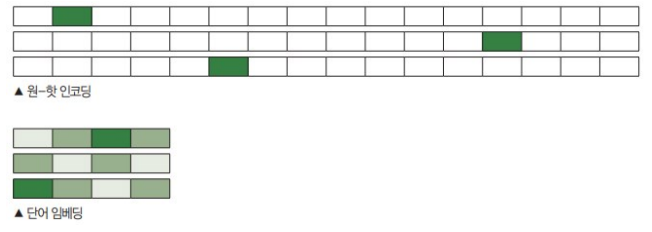
- 주어진 배열을 정해진 길이로 압축시킴
- 단어 임베딩으로 얻은 결과가 밀집된 정보를 가지고 있고 공간의 낭비가 적음
    - 각 단어 간의 유사도를 계산한 결과이기 때문 <br>
    ex) happy라는 단어는 bad보다는 good에 가깝고, cat이라는 단어는 good보다 dog에 가깝다는 것을 고려해 각 배열을 새로운 수치로 바꿔줌
    
    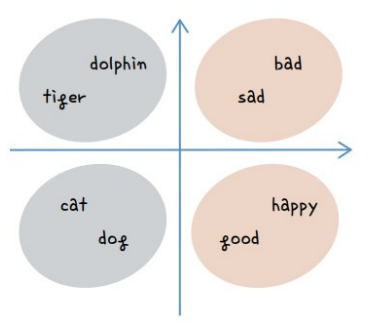

- 단어간 유사도 계산 : 오차 역전파
- 적절한 크기로 배열을 바꾸어 주기 위해 최적의 유사도를 계산하는 학습 과정을 거치는 것
- Embedding() 함수를 사용
    - Embedding(16,4,input_length=2) : 입력될 총 단어 수는 16ㅡ 임베딩 후 출력되는 벡터의 크기는 4, 매번 2개씩만 넣을것

### 4. 텍스트를 읽고 긍정, 부정 예측하기
영화를 보고 남긴 리뷰를 학습해서 각 리뷰가 긍정인지 부정인지 예측

In [6]:
# 우선 짧은 리뷰 열 개를 불러와 각각 긍정이면 1이라는 클래스,
# 부정적이면 0이라는 클래스로 지정
# 텍스트 리뷰 자료를 지정합니다.
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요",
        "추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요",
        "별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes = array([1,1,1,1,1,0,0,0,0,0])

In [7]:
# 토큰화 과정
token = Tokenizer()
# 각 단어를 하나의 토큰으로 변환
token.fit_on_texts(docs)
print(token.word_index) 

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [8]:
# 토큰에 지정된 인덱스로 새로운 배열 생성
x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n",  x)


리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


입력된 리뷰 데이터의 토큰 수가 다름<br>
'최고예요' = [3],'참 잘 만든 영화예요' = [4,5,6,7]<br>
딥러닝 모델에 입력하려면 데이터 길이가 동일해야 함 => 토큰 수 맞추기<br>

In [9]:
# 패딩(padding) : 길이를 똑같이 맞추어 주는 작업
# pad_sequences() 함수를 사용하면 원하는 길이보다 짧은 부분은 숫자 0을 넣어 채우고
# 긴 데이터는 잘라서 같인 길이로 맞춤
# 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)


패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [10]:
# 단어 임베딩을 통해 딥러닝 모델 만들고 결과 출력

# 임베딩에 입력될 단어의 수를 지정합니다.
# 전체 단어의 맨 앞에 0이 먼저 나와야 하므로 총 단어 수에 1을 더함
word_size = len(token.word_index) +1

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
# 패딩을 이용해 네 개의 길이로 맞추었으므로 input_length=4
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              168       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# 예측하기
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 1s 655ms/step - loss: 0.6977 - accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 18ms/step - loss: 0.6955 - accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6911 - accuracy: 0.6000
Epoch 5/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6889 - accuracy: 0.7000
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6867 - accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6846 - accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.7000
Epoch 9/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 1.0000
Epoch 11/20
1/1 [==============